In [28]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### create the machine learning algorithm

In [29]:
npz = np.load('Brest_Cancer_data_train.npz')
train_inputs = npz['inputs'].astype(np.float)
train_targets = npz['targets'].astype(np.int)

npz = np.load('Brest_Cancer_data_validation.npz')
validation_inputs, validation_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

npz = np.load('Brest_Cancer_data_test.npz')
test_inputs, test_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

In [30]:
test_inputs.shape

(49, 9)

In [31]:
test_targets.shape

(49,)

In [32]:
train_inputs.shape

(382, 9)

In [33]:
train_targets.shape

(382,)

In [34]:
train_targets

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,

# model
outline, optimizers, loss, early stopping and training

In [35]:
input_size = 9
output_size = 1
hidden_layer_size = 20

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(100,input_shape = (9,)),
                            tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),    
                            tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'), 
                            tf.keras.layers.Dense(output_size, activation = 'sigmoid')     
                            ])



In [36]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

BATCH_SIZE = 60
MAX_EPOCHS = 6

#  'sparse_categorical_crossentropy'

In [37]:
r = model.fit(train_inputs,
             train_targets,
             batch_size = BATCH_SIZE, 
             epochs = MAX_EPOCHS,
             validation_data = (validation_inputs, validation_targets),
             verbose = 2)

Train on 382 samples, validate on 47 samples
Epoch 1/6
382/382 - 0s - loss: 0.7198 - accuracy: 0.3325 - val_loss: 0.6600 - val_accuracy: 0.7021
Epoch 2/6
382/382 - 0s - loss: 0.6184 - accuracy: 0.8743 - val_loss: 0.5717 - val_accuracy: 0.9362
Epoch 3/6
382/382 - 0s - loss: 0.5290 - accuracy: 0.9398 - val_loss: 0.4752 - val_accuracy: 0.9787
Epoch 4/6
382/382 - 0s - loss: 0.4323 - accuracy: 0.9529 - val_loss: 0.3765 - val_accuracy: 0.9787
Epoch 5/6
382/382 - 0s - loss: 0.3351 - accuracy: 0.9529 - val_loss: 0.2863 - val_accuracy: 0.9787
Epoch 6/6
382/382 - 0s - loss: 0.2548 - accuracy: 0.9503 - val_loss: 0.2141 - val_accuracy: 0.9787


In [38]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

49/49 [==============================] - 0s 101us/sample - loss: 0.2489 - accuracy: 0.9592


In [39]:
print('\nTest loss: {0:.2f}. Test accuracy: {1: .2f}%'.format(test_loss, test_accuracy*100))


Test loss: 0.25. Test accuracy:  95.92%


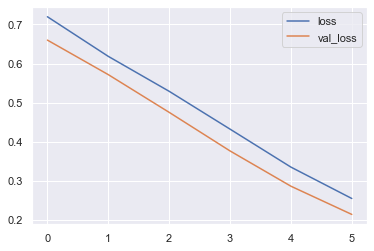

In [40]:
# PLOT LOSS AND VAL_LOSS OBTAINED BY MODEL.FIT()

plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()


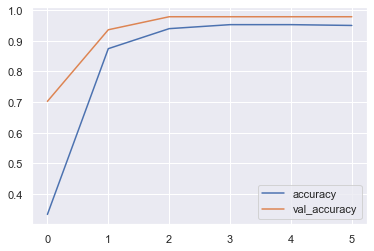

In [41]:
# PLOT ACCURACY OBTAINED BY MODEL.FIT()

plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [42]:
# model.predict(np.expand_dims(test_inputs, test_targets) 
prediction = model.predict(test_inputs)
#test_predictions = model.predict(normed_test_data).flatten()

In [43]:
test_inputs

array([[ 1.64748473,  1.82632633,  1.86301518,  1.44209826, -0.72231078,
         1.39504948, -0.08127165, -0.78204417, -0.42117268],
       [-1.27277868, -0.9026962 , -0.94030462, -0.77335664, -0.72231078,
        -0.9043769 , -1.27049156, -0.78204417, -0.42117268],
       [-1.27277868, -0.9026962 , -0.94030462, -0.77335664, -0.72231078,
        -0.9043769 , -1.27049156, -0.78204417, -0.42117268],
       [-0.29935755,  1.21987688,  0.92857525,  2.07508537,  0.09779505,
         1.39504948,  1.10794825,  0.41130655, -0.42117268],
       [ 0.02511617,  0.3102027 ,  0.30561529, -0.45686308,  0.50784796,
         1.39504948, -0.08127165, -0.18536881, -0.42117268],
       [ 0.02511617, -0.29624675,  0.61709527, -0.77335664, -0.72231078,
        -0.9043769 , -1.27049156, -0.78204417, -0.42117268],
       [-1.27277868, -0.9026962 , -0.94030462, -0.77335664, -0.72231078,
        -0.9043769 , -0.87408492, -0.78204417, -0.42117268],
       [-0.29935755, -0.9026962 , -0.94030462, -0.77335664, -0

In [44]:
prediction

array([[0.9011951 ],
       [0.11510286],
       [0.11510286],
       [0.87658066],
       [0.5549844 ],
       [0.28291515],
       [0.12153412],
       [0.2120826 ],
       [0.14437826],
       [0.5328705 ],
       [0.32106125],
       [0.79548436],
       [0.99210054],
       [0.88225967],
       [0.8706732 ],
       [0.35120386],
       [0.9382543 ],
       [0.17773758],
       [0.11510286],
       [0.8659096 ],
       [0.12153412],
       [0.14198934],
       [0.98511684],
       [0.15772918],
       [0.12848277],
       [0.17773758],
       [0.9725276 ],
       [0.16296078],
       [0.5612034 ],
       [0.11814028],
       [0.7182518 ],
       [0.7787139 ],
       [0.17854625],
       [0.12848277],
       [0.20435683],
       [0.8873619 ],
       [0.9041934 ],
       [0.9828393 ],
       [0.55609167],
       [0.6172183 ],
       [0.9294829 ],
       [0.12153412],
       [0.73171806],
       [0.15254295],
       [0.19238532],
       [0.71843064],
       [0.92555636],
       [0.206

In [45]:
test_targets

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0])

CONFUSION MATRIX

In [46]:
# model.predict(np.expand_dims(test_inputs, test_targets) 
prediction = model.predict(test_inputs)
#test_predictions = model.predict(normed_test_data).flatten()

In [47]:
prediction_rounded = np.around(prediction)

In [48]:
# just to compare with test_target
prediction_rounded_trans = prediction_rounded.T

In [49]:
# just to compare with test_target
prediction_rounded_trans

array([[1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
        1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
        0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
        0.]], dtype=float32)

In [50]:
prediction_rounded.shape

(49, 1)

In [51]:
#y_predicted = model.predict(test_inputs)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_targets, prediction_rounded)
cm

array([[23,  0],
       [ 2, 24]], dtype=int64)

MAKING A DATAFRAME FOR THE CONFUSION MATRIX

In [52]:
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,23,0
Actual 1,2,24


TO VISUALIZE THE CONFUSION MATRIX

Text(30.5, 0.5, 'Truth')

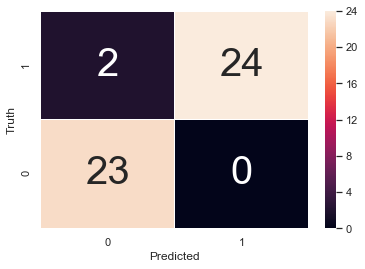

In [57]:
#plt.figure(figsize = (12,10))
sns.heatmap(cm, annot = True,annot_kws={'size':40}, linewidths=.5)
#plt.xlim(-1, 10)
plt.ylim(0, 2)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [54]:

model.save('tensorflow brest cancer- 1 output-binary cross entropy.h5')